In [ ]:
#Python DVP A5 by Team-1_Datavana
#Team Members
#Revanth Madasu_999903540
#Anusha Pakkiru_999903534

#Use Case: Elite Party Services

In [1]:
import piplite # When using the JupyterLite web-based environment, an "import" statement is used to load a layer called "piplite" that is needed for installing specific session-based libraries inside of a wrapper.
await piplite.install("seaborn") # An "await" statement is used for installing (when/if later called on) a library for plotting called "seaborn" from within a piplite wrapper for use in a session within the JupyterLite web-based environment.

In [2]:
# Import required libraries
await piplite.install("openpyxl")
import seaborn as sns # For importing seaborn library for statistical data visualization and aesthetics enhancement as sns.
import pandas as pd # For importing pandas library for data manipulation and analysis as pd.
import numpy as np # For importing NumPy library for numerical computations and array operations as np.
import matplotlib.pyplot as plt # For importing a module called "pyplot" from a library called "matplotlib" for plotting and assigning it to a variable called "plt".
import matplotlib as mpl 

In [3]:
M1 = pd.ExcelFile('1 - Elite Party Services - M1 - Initial dataset.xlsx') # The ExcelFile() function from pandas is used to load a excel dataset file called "1 - Elite Party Services - M1 - Initial dataset.xlsx" and assigning it to a variable called "M1".
M2 = pd.ExcelFile('1 - Elite Party Services - M2 - Change Over Time.xlsx')# The ExcelFile() function from pandas is used to load a excel dataset file called "1 - Elite Party Services - M2 - Change Over Time.xlsx" and assigning it to a variable called "M2".
M3 = pd.ExcelFile('1 - Elite Party Services - M3 - Data Composition.xlsx') # The ExcelFile() function from pandas is used to load a excel dataset file called "1 - Elite Party Services - M3 - Data Composition.xlsx" and assigning it to a variable called "M3".
M4 = pd.ExcelFile('1 - Elite Party Services - M4 - Data Distributions.xlsx') # The ExcelFile() function from pandas is used to load a excel dataset file called "1 - Elite Party Services - M4 - Data Distributions.xlsx" and assigning it to a variable called "M4".
M5 = pd.ExcelFile('1 - Elite Party Services - M5 - Group Comparisons.xlsx') # The ExcelFile() function from pandas is used to load a excel dataset file called "1 - Elite Party Services - M5 - Group Comparisons.xlsx" and assigning it to a variable called "M5".

M1_Data = pd.read_excel(M1, '1 - Elite Party Services - M1')
M2_Data = pd.read_excel(M2, '1 - Elite Party Services - M2')
M3_Data = pd.read_excel(M3, '1 - Elite Party Services - M3')
M4_Data = pd.read_excel(M4, '1 - Elite Party Services - M4')
M5_Data = pd.read_excel(M5, '1 - Elite Party Services - M5')

M1_DD = pd.read_excel(M1, 'Data Dictionary')
M2_DD = pd.read_excel(M2, 'Data Dictionary')
M3_DD = pd.read_excel(M3, 'Data Dictionary')
M4_DD = pd.read_excel(M4, 'Data Dictionary')
M5_DD = pd.read_excel(M5, 'Data Dictionary')

M1_M2 = pd.merge(M1_Data, M2_Data, on="ID")
M1_M2_M3 = pd.merge(M1_M2, M3_Data, on="ID")
M1_M2_M3_M4 = pd.merge(M1_M2_M3, M4_Data, on="ID")
M1_M2_M3_M4_M5 = pd.merge(M1_M2_M3_M4, M5_Data, on="ID")

In [9]:
M1_M2_M3_M4_M5.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Date,Q8,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
0,1,4,1,9,23,4,1,1,2022-08-18,1,...,6,5,3,2,1,0,2,-2,0,2
1,2,2,2,5,24,4,2,8,2022-05-01,-1,...,3,3,3,2,2,-2,3,0,-2,4
2,3,4,1,9,19,3,9,1,2022-02-19,-1,...,3,1,3,3,1,-2,1,0,0,2
3,4,4,1,9,20,3,2,8,2022-11-05,-2,...,3,1,1,1,1,2,1,-2,-2,0
4,5,3,1,6,24,4,9,1,2022-09-29,1,...,5,2,3,1,1,-1,1,-1,0,3


In [11]:
M1_DD_T = M1_DD.T
M2_DD_T = M2_DD.T
M3_DD_T = M3_DD.T
M4_DD_T = M4_DD.T
M5_DD_T = M5_DD.T

    eth  cat_-2  cat_-1  cat_0  cat_1  cat_2
0     1       2       0      0      2      0
1     2       0       3      2      3      1
2     3       2       2      4      1      4
3     4       0       4      0      3      0
4     5       4       4      7      7      3
5     6       0       1      3      1      2
6     7       0       1      0      0      0
7     8       1       3      3      0      0
8     9       3       4     10      5      3
9    10      10      21      9     10      3
10   11       0       1      1      0      0


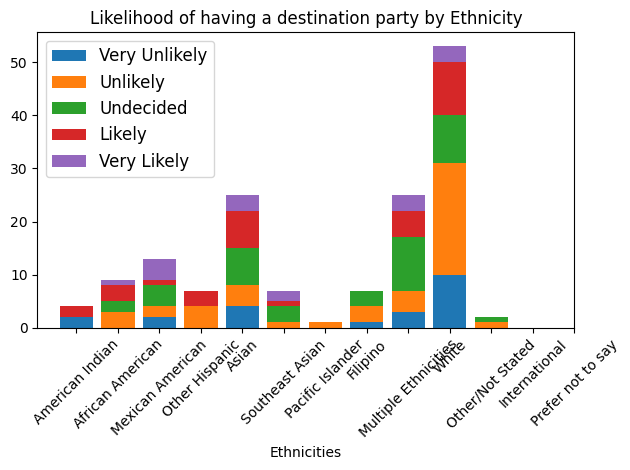

In [7]:
# Likelihood of having a destination party by Ethnicity
df = M1_M2_M3_M4_M5
x = df['Q3']
y = df['Q17']
grouped_data = df.groupby(['Q3', 'Q17']).size().reset_index(name='count')
ethnicities = grouped_data['Q3'].unique()


ethnicity_data = grouped_data[grouped_data['Q3'] == 1]
q17_values = ethnicity_data['Q17']


nodes = []
for ethnicity in ethnicities:
    node = {
        'eth':ethnicity,
        'cat_-2':0,
        'cat_-1':0,
        'cat_0':0,
        'cat_1':0,
        'cat_2':0
    }
    ethnicity_data = grouped_data[grouped_data['Q3'] == ethnicity]
    for index, row in ethnicity_data.iterrows():
        node['cat_'+str(row['Q17'])] = row['count']
    nodes.append(node)
    cats = ['cat_-2', 'cat_-1', 'cat_0', 'cat_1', 'cat_2']
    vals = {node['cat_-2'], node['cat_-1'], node['cat_0'], node['cat_1'], node['cat_2']}
    # plt.bar(cats, vals, label=node['eth'])
    q17_values = ethnicity_data['Q17']
destination_by_ethnicity = pd.DataFrame(nodes)
print(pd.DataFrame(nodes))

plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-1'], bottom = destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_0'], bottom = destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_1'], bottom = destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_2'], bottom = destination_by_ethnicity['cat_1'] + destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.legend(["Very Unlikely", "Unlikely", "Undecided", "Likely", "Very Likely"], loc='upper left', fontsize=12) 
plt.xlabel('Ethnicities')
plt.xticks(range(1, 14), ['American Indian', 'African American', 'Mexican American', 'Other Hispanic', 'Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White', 'Other/Not Stated', 'International', 'Prefer not to say'], rotation=45)
plt.title('Likelihood of having a destination party by Ethnicity')
plt.tight_layout()
plt.savefig("A5-Destination_Party_Ethnicity-Python.png")
plt.show()


    eth  cat_-2  cat_-1  cat_0  cat_1  cat_2
0     1       2       1      1      0      0
1     2       1       1      1      5      1
2     3       5       2      3      2      1
3     4       1       3      2      1      0
4     5      10       5      3      5      2
5     6       2       2      2      1      0
6     7       0       0      0      1      0
7     8       2       2      0      3      0
8     9       7       6      6      3      3
9    10      10      17     14      9      3
10   11       1       0      0      1      0


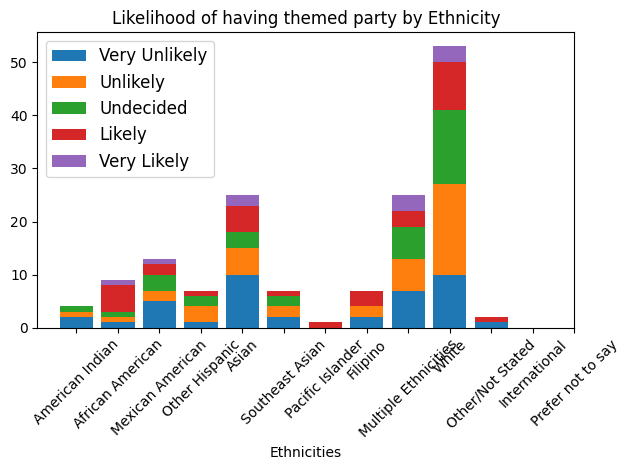

In [8]:
# Likelihood of having themed party by Ethnicity
df = M1_M2_M3_M4_M5
x = df['Q3']
y = df['Q19']
grouped_data = df.groupby(['Q3', 'Q19']).size().reset_index(name='count')
ethnicities = grouped_data['Q3'].unique()


ethnicity_data = grouped_data[grouped_data['Q3'] == 1]
q17_values = ethnicity_data['Q19']


nodes = []
for ethnicity in ethnicities:
    node = {
        'eth':ethnicity,
        'cat_-2':0,
        'cat_-1':0,
        'cat_0':0,
        'cat_1':0,
        'cat_2':0
    }
    ethnicity_data = grouped_data[grouped_data['Q3'] == ethnicity]
    for index, row in ethnicity_data.iterrows():
        node['cat_'+str(row['Q19'])] = row['count']
    nodes.append(node)
    cats = ['cat_-2', 'cat_-1', 'cat_0', 'cat_1', 'cat_2']
    vals = {node['cat_-2'], node['cat_-1'], node['cat_0'], node['cat_1'], node['cat_2']}
    q17_values = ethnicity_data['Q19']
destination_by_ethnicity = pd.DataFrame(nodes)
print(pd.DataFrame(nodes))

plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_-1'], bottom = destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_0'], bottom = destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_1'], bottom = destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.bar(destination_by_ethnicity['eth'], destination_by_ethnicity['cat_2'], bottom = destination_by_ethnicity['cat_1'] + destination_by_ethnicity['cat_0'] + destination_by_ethnicity['cat_-1'] + destination_by_ethnicity['cat_-2'])
plt.legend(["Very Unlikely", "Unlikely", "Undecided", "Likely", "Very Likely"], loc='upper left', fontsize=12) 
plt.xlabel('Ethnicities')
plt.title('Likelihood of having themed party by Ethnicity')
plt.xticks(range(1, 14), ['American Indian', 'African American', 'Mexican American', 'Other Hispanic', 'Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White', 'Other/Not Stated', 'International', 'Prefer not to say'], rotation=45)
plt.tight_layout()
plt.savefig("A5-Themed_Party_Ethnicity-Python.png")
plt.show()


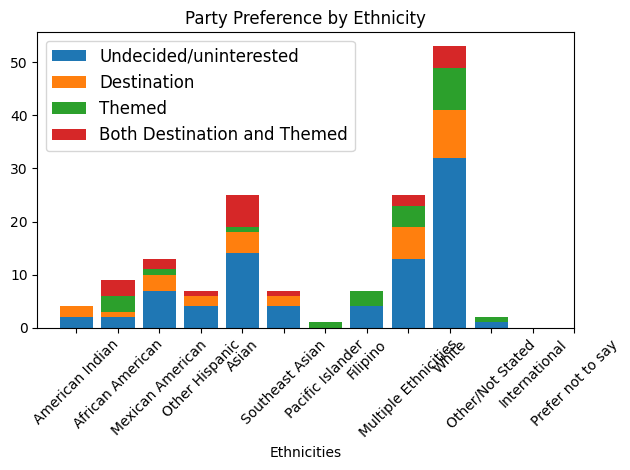

In [9]:
# Party Preference by different ethnicity
df = M1_M2_M3_M4_M5
x = df['Q3']
y1 = df['Q19']
y2 = df['Q17']

def get_party_type(row):
    party_type = ""
    if row['Q19'] > 0 and row['Q17'] > 0:
        party_type = "Both Destination and Themed"
    elif row['Q19'] > 0:
        party_type = "Themed"
    elif row['Q17'] > 0:
        party_type = "Destination"
    else:
        party_type = "Undecided/uninterested"
    return party_type
    
df['party_type_pref'] = df.apply(get_party_type, axis=1)
# df['party_type_pref']
grouped_data = df.groupby(['Q3', 'party_type_pref']).size().reset_index(name='count')

# print(grouped_data)
ethnicities = grouped_data['Q3'].unique()


nodes = []
for ethnicity in ethnicities:
    node = {
        'eth':ethnicity,
        'Both Destination and Themed':0,
        'Themed':0,
        'Destination':0,
        'Undecided/uninterested':0
    }
    ethnicity_data = grouped_data[grouped_data['Q3'] == ethnicity]
    for index, row in ethnicity_data.iterrows():
        node[row['party_type_pref']] = row['count']
    nodes.append(node)
    cats = ['Both Destination and Themed', 'Themed', 'Destination', 'Undecided/uninterested']
    vals = {node['Both Destination and Themed'], node['Themed'], node['Destination'], node['Undecided/uninterested']}
    # plt.bar(cats, vals, label=node['eth'])
party_theme_by_ethnicity = pd.DataFrame(nodes)
# print(party_theme_by_ethnicity)

plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Undecided/uninterested'])
plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Destination'], bottom = party_theme_by_ethnicity['Undecided/uninterested'])
plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Themed'], bottom = party_theme_by_ethnicity['Undecided/uninterested'] + party_theme_by_ethnicity['Destination'])
plt.bar(party_theme_by_ethnicity['eth'], party_theme_by_ethnicity['Both Destination and Themed'], bottom = party_theme_by_ethnicity['Undecided/uninterested'] + party_theme_by_ethnicity['Destination'] + party_theme_by_ethnicity['Themed'])
plt.legend(['Undecided/uninterested', "Destination", "Themed", "Both Destination and Themed"], loc='upper left', fontsize=12) 
plt.xlabel('Ethnicities')
plt.title('Party Preference by Ethnicity')
plt.xticks(range(1, 14), ['American Indian', 'African American', 'Mexican American', 'Other Hispanic', 'Asian', 'Southeast Asian', 'Pacific Islander', 'Filipino', 'Multiple Ethnicities', 'White', 'Other/Not Stated', 'International', 'Prefer not to say'], rotation=45)
plt.tight_layout()
plt.savefig("A5-Party_Preference_Ethnicity-Python.png")
plt.show()

In [12]:
pd.set_option('display.max_colwidth', None)
M5_DD_T 

,0,1,2,3,4
ID,Q17,Q18,Q19,Q20,Q21
ResponseID,Likelihood of having a destination party?,Size of party?,Likelihood of themed party?,Likelihood of hiring Hooray! for elite party services?,Budget for party?
Unnamed: 2,Very Unlikely (-2),10 or less (1),Very Unlikely (-2),Very Unlikely (-2),Prefer not to disclose (0)
Unnamed: 3,Unlikely (-1),11 to 15 (2),Unlikely (-1),Unlikely (-1),$999 or less (1)
Unnamed: 4,Undecided (0),16 to 20 (3),Undecided (0),Undecided (0),"$1,000 to $1,999 (2)"
Unnamed: 5,Likely (1),21 to 25 (4),Likely (1),Likely (1),"$2,000 to $2,999 (3)"
Unnamed: 6,Very Likely (2),26 or more (5),Very Likely (2),Very Likely (2),"$3,000 or more (4)"


In [13]:
budget_levels = {
    0: 'Prefer not to disclose',
    1: '$999 or less',
    2: '$1,000 to $1,999',
    3: '$2,000 to $2,999',
    4: '$3,000 or more'
}
education_levels = {
    1: 'Some high school',
    2: 'High school diploma',
    3: 'Some college',
    4: '4-year undergraduate degree',
    5: "Master's degree or higher",
    6: 'Doctorate'
}
income_ranges = {
    1: '$39,999 or less',
    2: '$40,000 to $49,999',
    3: '$50,000 to $59,999',
    4: '$60,000 to $69,999',
    5: '$70,000 to $79,999',
    6: '$80,000 to $89,999',
    7: '$90,000 to $99,999',
    8: '$100,000 or more',
    9: 'Prefer not to disclose'
}
likelihood_levels = {
    -2: 'Very Unlikely',
    -1: 'Unlikely',
    0: 'Undecided',
    1: 'Likely',
    2: 'Very Likely'
}

In [14]:
pivot = M1_M2_M3_M4_M5.pivot_table(index =['Q6'],
                       values =['Q5', 'Q8', 'Q21'],
                       aggfunc ='mean').astype(int)


pivot = pivot.rename(columns={'Q5': 'Education', 'Q6': 'Annual Income', 'Q8': 'Likelihood of using EPS', 'Q21': 'Budget of Party'})


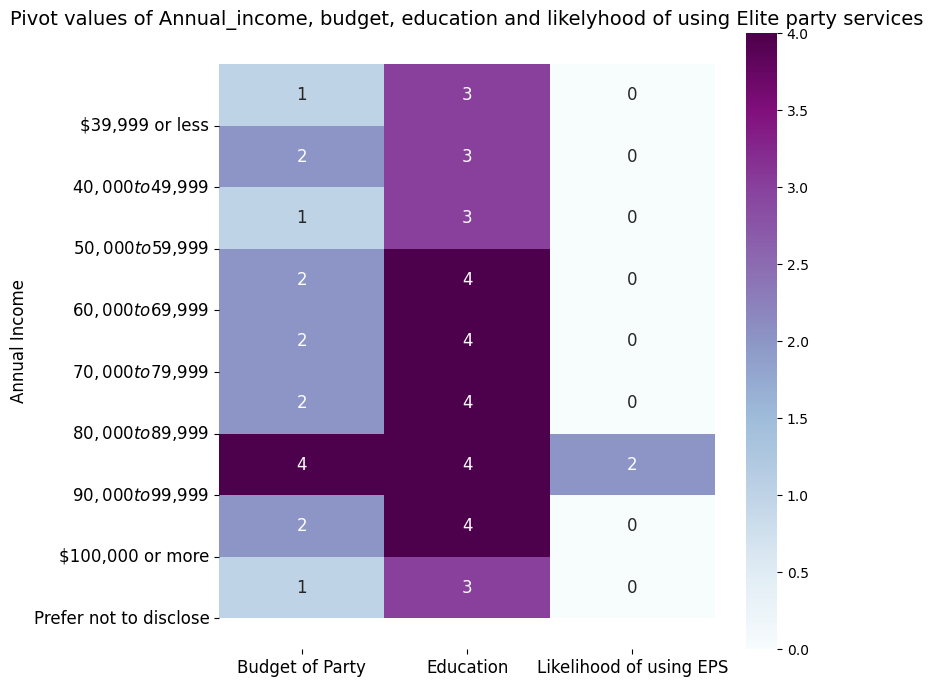

In [16]:
y_labels = [income_ranges[i] for i in range(1, 10)]
y_ticks = list(range(1, 10))
plt.figure(figsize=(8,8)) 
ax = sns.heatmap(pivot, vmin=0, vmax=4, annot=True, fmt='g', cmap='BuPu', annot_kws={'fontsize': 12})
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5) 
plt.title(label="Pivot values of Annual_income, budget, education and likelyhood of using Elite party services", fontsize=14)
plt.ylabel("Annual Income",fontsize = 12)
plt.yticks(y_ticks, y_labels,fontsize=12,rotation=0)
plt.xticks(fontsize=12)
plt.savefig("Pivot values of Annual_income, budget, education and likelyhood of using Elite party services.png")

plt.show() 